In [1]:
#Dependencies
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

In [2]:
#Load Data File
data_iris = pd.read_csv('iris.csv')

In [3]:
#Peek in at the data
print (data_iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
#Statistics
print (data_iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
# Shape of the data set
print (data_iris.shape)

(150, 5)


In [6]:
#Unique classes
print(data_iris['species'].unique())

['setosa' 'versicolor' 'virginica']


In [7]:
#Count of each group
pd.pivot_table(data_iris, columns = 'species', aggfunc = 'count')

species,setosa,versicolor,virginica
petal_length,50,50,50
petal_width,50,50,50
sepal_length,50,50,50
sepal_width,50,50,50


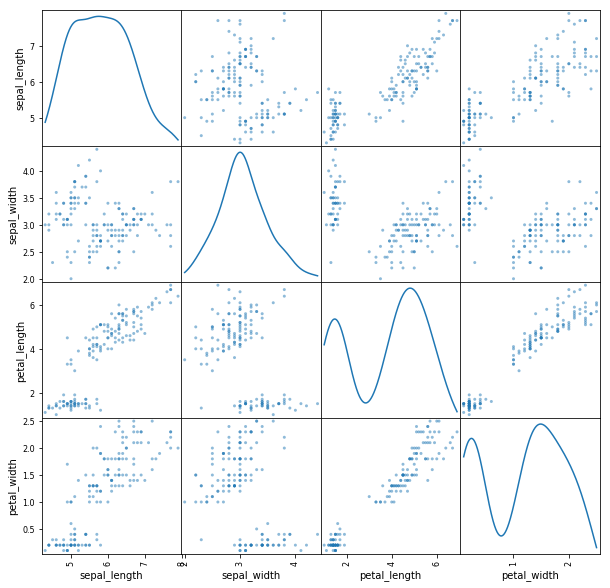

In [8]:
out = scatter_matrix(data_iris, figsize = (10,10) , diagonal = 'kde')

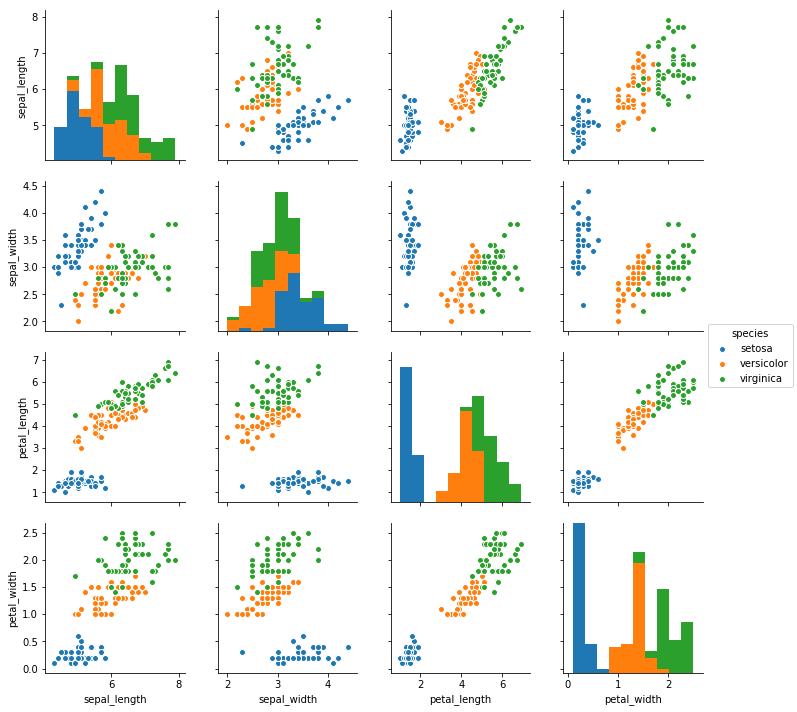

In [9]:
# Scatter Matrix to determine the relationship between input and the Species.
sns.pairplot(data_iris, hue = 'species')

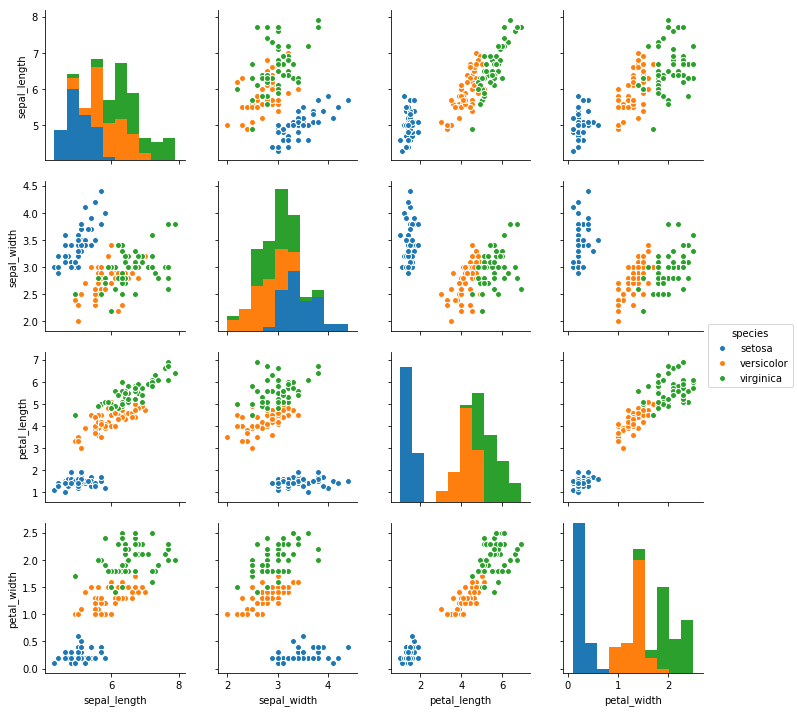

In [10]:
# Removing outliers of setosa
data_iris = data_iris.loc[(data_iris['species'] != 'setosa') | (data_iris['sepal_width'] >= 2.5)]
sns.pairplot(data_iris, hue = 'species')

In [11]:
#Check for any NULL values in the data set
data_iris.loc[(data_iris['species'].isnull()) |
              (data_iris['sepal_length'].isnull()) |
              (data_iris['sepal_width'].isnull()) |
              (data_iris['petal_length'].isnull()) |
              (data_iris['petal_width'].isnull())]

,sepal_length,sepal_width,petal_length,petal_width,species


In [12]:
#Assign the Clean data to another csv file
data_iris.to_csv('iris_data_clean.csv', index = False)

#Create another data frame for the clean file
data_iris_clean = pd.read_csv('iris_data_clean.csv')

print (data_iris_clean.shape)

(149, 5)


In [13]:
#Assign X
X_iris = data_iris_clean.drop('species', axis = 1)
X_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [14]:
# Assign Y
Y_iris = data_iris['species']

In [15]:
#Training and Test Data Split
X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris, test_size=0.25, random_state=2)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(111, 4) (111,) (38, 4) (38,)


In [16]:
# Create a list to assign the best scores from each Classifier
list_scores = []

In [17]:
#Classifier - Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, Y_train)
clf_tree.score(X_test, Y_test)

0.94736842105263153

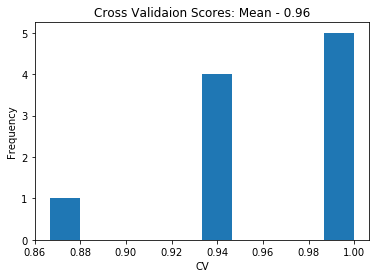

In [18]:
# Cross Validation Score with 10
clf_tree_cv = DecisionTreeClassifier()

cv_scores = cross_val_score(clf_tree_cv, X_iris, Y_iris, cv = 10, scoring = 'accuracy')

plt.title("Cross Validaion Scores: Mean - {}".format(cv_scores.mean()))
plt.xlabel("CV")
plt.ylabel("Frequency")
plt.hist(cv_scores)
plt.show()

In [19]:
#Parameters Tuning
parameter_grid = {'criterion': ['gini', 'entropy']
                 , 'min_samples_split': [2, 5, 10]
                 , 'min_samples_leaf': [1, 2, 3, 4, 5]}

clf_tree_grid = DecisionTreeClassifier(random_state = 2)
parameter_search = GridSearchCV(clf_tree_grid, parameter_grid, scoring = 'accuracy')
parameter_search.fit(X_train, Y_train)

print ('Best Score for Training Set: {}'. format(parameter_search.best_score_))
print ('Best Parameter for Training Set: {}'. format(parameter_search.best_params_))

Best Score for Training Set: 0.954954954954955
Best Parameter for Training Set: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [20]:
# Using the best estimator and re-running
clf_tree_best = parameter_search.best_estimator_
clf_tree_best.fit(X_train, Y_train)
print('Modified Classifier Score using DecisionTree: {}'. format(clf_tree_best.score(X_test, Y_test)))

list_scores.append(clf_tree_best.score(X_test, Y_test))

Modified Classifier Score using DecisionTree: 0.9736842105263158


In [21]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf_rand_forest = RandomForestClassifier(random_state = 2)
clf_rand_forest.fit(X_train, Y_train)
clf_rand_forest.score(X_test, Y_test)

0.97368421052631582

In [22]:
#Parameters tuning
parameter_rand_forest = {'n_estimators': [1, 2, 4, 8, 10, 20]
                        , 'max_features': ['auto', None]
                        , 'min_samples_split': [2, 3, 4, 5]
                        , 'min_samples_leaf': [1, 2, 3, 4]}

clf_forest_grid = RandomForestClassifier(random_state = 1)
parameter_search = GridSearchCV(clf_forest_grid, parameter_rand_forest, scoring = 'accuracy')
parameter_search.fit(X_train, Y_train)

print ('Best Score for Training Set: {}'. format(parameter_search.best_score_))
print ('Best Parameter for Training Set: {}'. format(parameter_search.best_params_))

Best Score for Training Set: 0.972972972972973
Best Parameter for Training Set: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 8}


In [23]:
# Using the best fit
clf_forest_best = parameter_search.best_estimator_
clf_forest_best.fit(X_train, Y_train)
print('Modified Classifier Score using RandomForest: {}'. format(clf_forest_best.score(X_test, Y_test)))

list_scores.append(clf_forest_best.score(X_test, Y_test))

Modified Classifier Score using RandomForest: 0.9736842105263158


In [24]:
#SVM Classifier
from sklearn.svm import SVC

clf_svc = SVC(random_state = 1)
clf_svc.fit(X_train, Y_train)
clf_svc.score(X_test, Y_test)

0.97368421052631582

In [25]:
#Parameter tuning

parameter_search_svm = {'C': [1, 5, 10, 100]
                       , 'kernel': ['linear', 'poly', 'rbf']}

clf_parameter_svm = SVC(random_state = 1)
parameter_svm = GridSearchCV(clf_parameter_svm, parameter_search_svm, scoring = 'accuracy')
parameter_svm.fit(X_train, Y_train)

print ('Best Score for Training Set: {}'. format(parameter_svm.best_score_))
print ('Best Parameter for Training Set: {}'. format(parameter_svm.best_params_))

Best Score for Training Set: 0.990990990990991
Best Parameter for Training Set: {'C': 1, 'kernel': 'linear'}


In [26]:
# Best Fit
clf_svm_best = parameter_svm.best_estimator_
clf_svm_best.fit(X_train, Y_train)
print('Modified Classifier Score using RandomForest: {}'. format(clf_svm_best.score(X_test, Y_test)))

list_scores.append(clf_svm_best.score(X_test, Y_test))

Modified Classifier Score using RandomForest: 0.9736842105263158


In [27]:
# Comparisons of Algorithm
list_scores

[0.97368421052631582, 0.97368421052631582, 0.97368421052631582]